<a href="https://colab.research.google.com/github/Tanmay2710/ML-project/blob/master/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

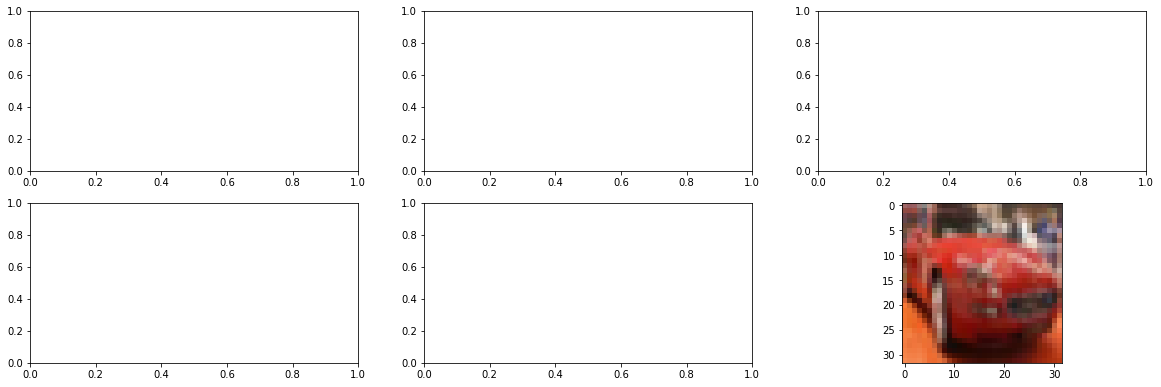

In [5]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
plt.imshow(train_X[i])
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [8]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [9]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [13]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 272s 174ms/step - loss: 1.6925 - accuracy: 0.3853 - val_loss: 1.3456 - val_accuracy: 0.5206
Epoch 2/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.3073 - accuracy: 0.5326 - val_loss: 1.1663 - val_accuracy: 0.5877
Epoch 3/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.1404 - accuracy: 0.5960 - val_loss: 1.0588 - val_accuracy: 0.6221
Epoch 4/10
1563/1563 [==============================] - 270s 173ms/step - loss: 1.0203 - accuracy: 0.6378 - val_loss: 1.0185 - val_accuracy: 0.6402
Epoch 5/10
1563/1563 [==============================] - 272s 174ms/step - loss: 0.9237 - accuracy: 0.6720 - val_loss: 0.9905 - val_accuracy: 0.6517
Epoch 6/10
1563/1563 [==============================] - 273s 174ms/step - loss: 0.8422 - accuracy: 0.7037 - val_loss: 0.9322 - val_accuracy: 0.6773
Epoch 7/10
1563/1563 [==============================] - 270s 173ms/step - loss: 0.7648 - accuracy: 0.7304 - val_

In [14]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 11s 36ms/step - loss: 0.9075 - accuracy: 0.6975
69.74999904632568


In [15]:
model.save("model1_cifar_10epoch.h5")

In [21]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("/content/dog_demo.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

5 dog
